# Task 2: Decision Trees for Classification

## Library

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Load Data

In [12]:
# Load Data
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

data1 = pd.read_csv(os.path.join(DATA_DIR, "iris_test.csv"))
data2 = pd.read_csv(os.path.join(DATA_DIR, "iris_train.csv"))

In [13]:
print("iris_test.csv Data Shape:", data1.shape)
print("iris_train.csv Data Shape:", data2.shape)

iris_test.csv Data Shape: (30, 5)
iris_train.csv Data Shape: (120, 5)


In [14]:
print("iris_test.csv Data:")
display(data1)
print("iris_train.csv Data:")
display(data2)

iris_test.csv Data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.310998,-0.587764,0.535296,0.001753,versicolor
1,-0.173674,1.726266,-1.170675,-1.181504,setosa
2,2.249683,-1.050569,1.786341,1.447956,virginica
3,0.189830,-0.356361,0.421564,0.396172,versicolor
4,1.159173,-0.587764,0.592162,0.264699,versicolor
5,-0.537178,0.800654,-1.284407,-1.050031,setosa
6,-0.294842,-0.356361,-0.090227,0.133226,versicolor
7,1.280340,0.106445,0.762759,1.447956,virginica
8,0.432165,-1.976181,0.421564,0.396172,versicolor
9,-0.052506,-0.819166,0.080370,0.001753,versicolor


iris_train.csv Data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,-1.506521,1.263460,-1.568735,-1.312977,setosa
1,-0.173674,3.114684,-1.284407,-1.050031,setosa
2,1.038005,0.106445,0.364699,0.264699,versicolor
3,-1.264185,0.800654,-1.227541,-1.312977,setosa
4,-1.748856,0.337848,-1.398138,-1.312977,setosa
...,...,...,...,...,...
115,0.310998,-0.587764,0.137236,0.133226,versicolor
116,-1.143017,-1.281972,0.421564,0.659118,virginica
117,-0.052506,2.189072,-1.455004,-1.312977,setosa
118,-0.052506,-1.050569,0.137236,0.001753,versicolor


## Split Data

In [ ]:
# Separate Features & Labels
X_train = data2.drop(columns=["species"])  # Data latih
y_train = data2["species"]

X_test = data1.drop(columns=["species"])   # Data uji
y_test = data1["species"]

# Check the number of classes
print("\nTrain Label Distribution:\n", y_train.value_counts())
print("\nTest Label Distribution:\n", y_test.value_counts())



Train Label Distribution:
 species
versicolor    41
setosa        40
virginica     39
Name: count, dtype: int64

Test Label Distribution:
 species
virginica     11
setosa        10
versicolor     9
Name: count, dtype: int64


## Train

In [ ]:
# Decision Tree model initialization
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on test data
y_pred = dt_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("\nAccuracy (Before Pruning):", accuracy)
print("\nF1-Score (Before Pruning):", f1)
print("\nClassification Report (Before Pruning):\n", classification_report(y_test, y_pred))


Accuracy (Before Pruning): 1.0

F1-Score (Before Pruning): 1.0

Classification Report (Before Pruning):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualization

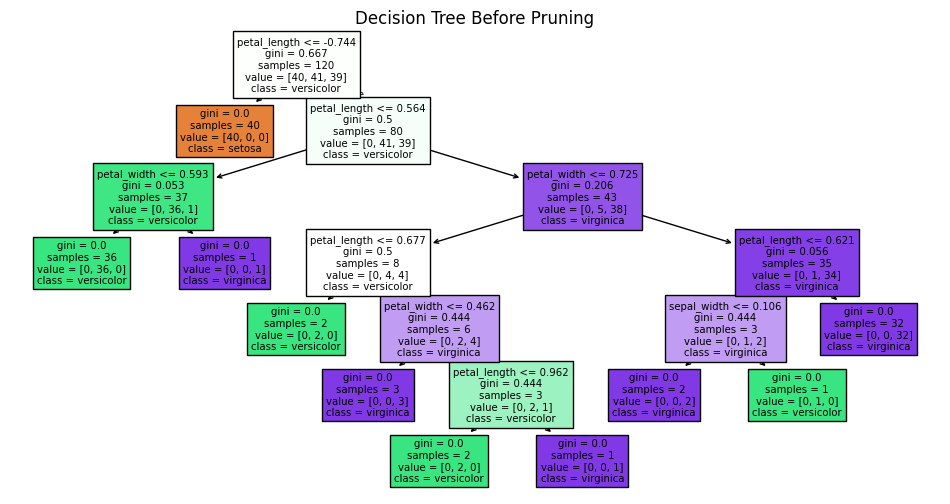

In [17]:
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=X_train.columns, class_names=dt_model.classes_, filled=True)
plt.title("Decision Tree Before Pruning")
plt.show()

In [18]:
# Display Decision Tree rules before pruning
rules_before = export_text(dt_model, feature_names=list(X_train.columns))
print("\nDecision Tree Rules (Before Pruning):\n", rules_before)


Decision Tree Rules (Before Pruning):
 |--- petal_length <= -0.74
|   |--- class: setosa
|--- petal_length >  -0.74
|   |--- petal_length <= 0.56
|   |   |--- petal_width <= 0.59
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  0.59
|   |   |   |--- class: virginica
|   |--- petal_length >  0.56
|   |   |--- petal_width <= 0.72
|   |   |   |--- petal_length <= 0.68
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  0.68
|   |   |   |   |--- petal_width <= 0.46
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- petal_width >  0.46
|   |   |   |   |   |--- petal_length <= 0.96
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- petal_length >  0.96
|   |   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  0.72
|   |   |   |--- petal_length <= 0.62
|   |   |   |   |--- sepal_width <= 0.11
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- sepal_width >  0.11
|   |   |   |   |   |--- class: vers

## Hyperparameter Tuning

In [19]:
# Hyperparameter Tuning
param_grid = {"max_depth": range(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_["max_depth"]
print(f"\nBest max_depth from GridSearch: {best_depth}")


Best max_depth from GridSearch: 3


## Prune

In [ ]:
dt_pruned = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_pruned.fit(X_train, y_train)

# Re-prediction after pruning
y_pred_pruned = dt_pruned.predict(X_test)

# Model Evaluation After Pruning
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned, average="weighted")

print("\nAccuracy (After Pruning):", accuracy_pruned)
print("\nF1-Score (After Pruning):", f1_pruned)
print("\nClassification Report (After Pruning):\n", classification_report(y_test, y_pred_pruned))


Accuracy (After Pruning): 1.0

F1-Score (After Pruning): 1.0

Classification Report (After Pruning):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualization after Prune

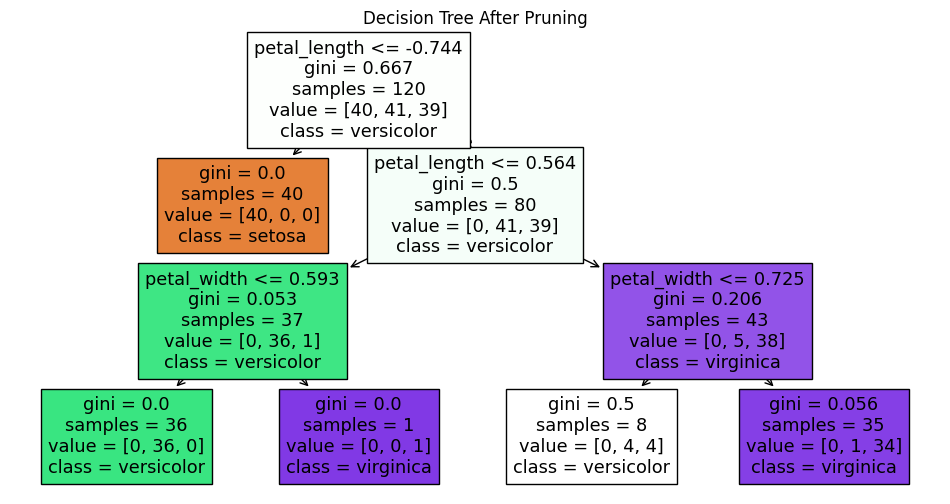

In [21]:
plt.figure(figsize=(12, 6))
plot_tree(dt_pruned, feature_names=X_train.columns, class_names=dt_pruned.classes_, filled=True)
plt.title("Decision Tree After Pruning")
plt.show()

In [22]:
# Display Decision Tree rules after pruning
rules_after = export_text(dt_pruned, feature_names=list(X_train.columns))
print("\nDecision Tree Rules (After Pruning):\n", rules_after)


Decision Tree Rules (After Pruning):
 |--- petal_length <= -0.74
|   |--- class: setosa
|--- petal_length >  -0.74
|   |--- petal_length <= 0.56
|   |   |--- petal_width <= 0.59
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  0.59
|   |   |   |--- class: virginica
|   |--- petal_length >  0.56
|   |   |--- petal_width <= 0.72
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  0.72
|   |   |   |--- class: virginica



## Confusion Matrix Visualization

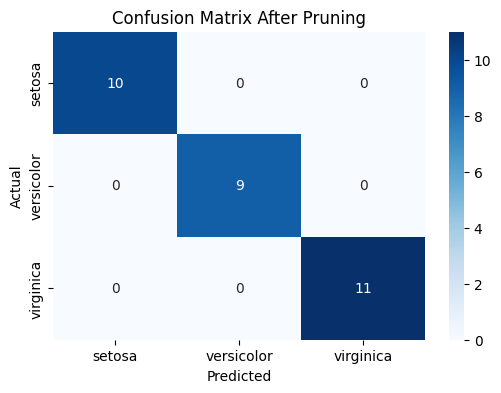

In [23]:
cm = confusion_matrix(y_test, y_pred_pruned)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dt_pruned.classes_, yticklabels=dt_pruned.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After Pruning")
plt.show()

## Feature Analysis

In [24]:
# Display the most important features
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_pruned.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
         Feature  Importance
2  petal_length    0.934626
3   petal_width    0.065374
0  sepal_length    0.000000
1   sepal_width    0.000000
